In [ ]:
#Завантаження бібліотек та модулів
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

Інформація про датасет Fashion-MNIST (датасет одягу+сумки):

In this notebook, we will be working with fashion mnist data set: https://www.kaggle.com/datasets/zalando-research/fashionmnist



*   60,000 train images
*   10,000 test images
*   image size (28,28)
*   Labels
---
*   0 T-shirt/top
*   1 Trouser
*   2 Pullover
*  3 Dress
*  4 Coat
*  5 Sandal
*   6 Shirt
*   7 Sneaker
*   8 Bag
*   9 Ankle boot

The data set is balanced

Задача багатокласової класифікації

In [ ]:
#Завантаження датасету та поділ на тренувальну і тестову вибірки
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


Співвідношення тренувальних даних до тестових 6:1, картинки розміром 28x28

In [ ]:
#Перевірка розподілу таргету у тренуваньлій вибірці
from collections import Counter
Counter(y_train)
#pd.DataFrame(y_train).value_counts() #- можна перевірити розподіл ще так

Counter({9: 6000,
         0: 6000,
         3: 6000,
         2: 6000,
         7: 6000,
         5: 6000,
         1: 6000,
         6: 6000,
         4: 6000,
         8: 6000})

Розподіл класів для таргету є рівномірний

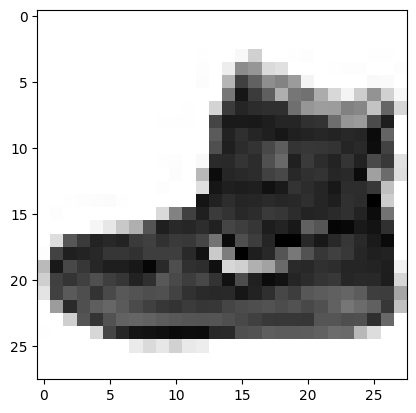

9


In [ ]:
#Відображення першого елемента датасету і порівняння його з таргетом
plt.imshow(x_train[0], cmap='Greys')
plt.show()
print(y_train[0])

Як бачимо, на малюнку - черевик, що відповідає мітці

Закодуємо таргет


In [ ]:
# сп.1 - через to_categorical
from tensorflow.keras.utils import to_categorical
y_train_ohe = to_categorical(y_train, num_classes=10)
y_train_ohe.shape

(60000, 10)

In [ ]:
#сп.2 - через one hot encoding
y_test_ohe = tf.one_hot(y_test, depth=10)
y_test_ohe.shape

TensorShape([10000, 10])

Звернемо увагу на відмінність вихідних випів: через to_categorical отримуємо numpy масив, через tf.one_hot - TensorFlow Tensor

Побудова CNN моделі

In [ ]:
#Реорганізація існуючих даних: додавання нового виміру для сумісності з вимогами до вводу моделей (для чорно-білих зображень достатньо одного каналу)
x_train = x_train.reshape((60000, 28,28,1))
x_train = x_train / 255.0 # Нормалізація даних до відрізку [0,1]

x_test = x_test.reshape((10000, 28,28,1))
x_test = x_test / 255.0

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
# фкнкція з побудови CNN з використанням функціонального API

def CNN_builder():

    # Вхідний шар 28x28x1 - для монохромного зображення
    inputs= keras.Input(shape=(28,28,1), name='Input layer')

    #Згортковий шар з 32 матрицями 3x3, попіксельним проходженням та функцією активації ReLU
    x = layers.Conv2D(filters= 32, kernel_size = 3, strides = (1,1) , padding='valid',  activation='relu' ,name="conv_layer_1")(inputs)

    # MaxPooling: зменшує кожний розмір у 2 рази (бере максимум у блоках 2x2)
    x = layers.MaxPool2D(pool_size=2, name="pooling_1")(x)

    #Згортковий шар з 64 матрицями 3x3, попіксельним проходженням та функцією активації ReLU
    x = layers.Conv2D(filters= 64, kernel_size = 3, activation='relu', name="conv_layer_2")(x)

    # MaxPooling: зменшує кожний розмір у 2 рази (бере максимум у блоках 2x2)
    x = layers.MaxPool2D(pool_size=2, name="pooling_2")(x)

    #Згортковий шар з 128 матрицями 3x3, попіксельним проходженням та функцією активації ReLU
    x = layers.Conv2D(filters= 128, kernel_size = 3, activation='relu', name="conv_layer_3")(x)

    #перетворення багатовимірного тензору (результат згорток і пулінгу) в одновимірний вектор, щоб передати його до щільного (Dense) шару
    x = layers.Flatten(name="flattening_layer")(x)

    # Щільний повнозв'язний шар з 10 нейронів, що дорівнює кількості класів, і функцією активації softmax, яка забезпечує, що виходи є ймовірностями, які підсумовуються до 1
    outputs = layers.Dense(units= 10, activation='softmax', name='output_layer')(x)

    # Створення моделі
    model = keras.Model(inputs= inputs , outputs=outputs, name='my_first_CNN_model')

    #Компіляція моделі: задання оптимізатора, функції втрат для навчання і метрики для моніторингу точності моделі під час тренування
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
#Виклик функції CNN_builder(), яка створює модель нейронної мережі
model = CNN_builder()

#Вивід інформації про структуру моделі
model.summary()

Model: "my_first_CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_1 (Conv2D)                │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_1 (MaxPooling2D)             │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_2 (Conv2D)                │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_2 (MaxPooling2D)             │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_3 (Conv2D)                │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flattening_layer (Flatten)           │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          11,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import  ModelCheckpoint
#Застосування методу ModelCheckpoint для збереження моделі в процесі тренування
modelcheckpoint  = ModelCheckpoint(filepath = "/content/drive/MyDrive/ML_Hillel/HW_L15_CNN/CNN_basic.keras", save_best_only=True, monitor="val_loss")
callback_list    = [modelcheckpoint]

In [ ]:
#Тренування моделі на 20 епохах
history = model.fit(x=x_train, y=y_train_ohe, validation_data=(x_test, y_test_ohe),
          epochs=20, batch_size=128, callbacks=callback_list)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 69s 144ms/step - accuracy: 0.6703 - loss: 0.8870 - val_accuracy: 0.8455 - val_loss: 0.4269
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 65s 138ms/step - accuracy: 0.8565 - loss: 0.3987 - val_accuracy: 0.8625 - val_loss: 0.3789
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 91s 158ms/step - accuracy: 0.8814 - loss: 0.3289 - val_accuracy: 0.8830 - val_loss: 0.3235
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 71s 152ms/step - accuracy: 0.8951 - loss: 0.2902 - val_accuracy: 0.8959 - val_loss: 0.2952
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 92s 173ms/step - accuracy: 0.9063 - loss: 0.2603 - val_accuracy: 0.8949 - val_loss: 0.2878
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 140ms/step - accuracy: 0.9118 - loss: 0.2447 - val_accuracy: 0.8957 - val_loss: 0.2797
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 144ms/step - accuracy: 0.9197 - loss: 0.2224 - val_accuracy: 0.9028 - val_loss: 0.2734
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 67s 143ms/step - accuracy: 0.9239 - loss: 0

In [ ]:
model.metrics_names

['loss', 'compile_metrics']

In [ ]:
metrics = pd.DataFrame(history.history)

In [ ]:
metrics.head(20)

,accuracy,loss,val_accuracy,val_loss
0,0.769700,0.623191,0.8455,0.426916
1,0.863933,0.377385,0.8625,0.378930
2,0.885000,0.318690,0.8830,0.323509
3,0.895867,0.287057,0.8959,0.295195
4,0.904217,0.263043,0.8949,0.287785
5,0.911050,0.244439,0.8957,0.279725
6,0.918000,0.226161,0.9028,0.273423
7,0.922683,0.211202,0.9107,0.249086
8,0.928667,0.196663,0.9062,0.269562
9,0.932500,0.185126,0.9106,0.266198


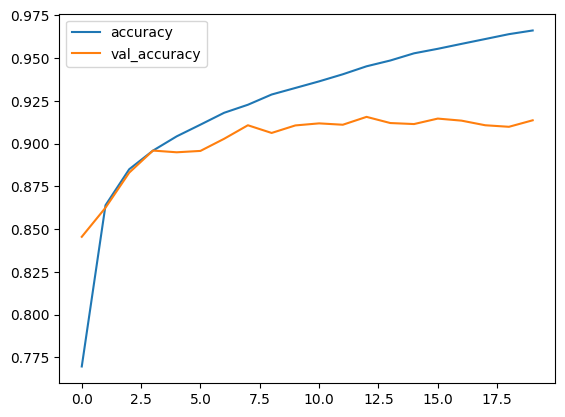

In [ ]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

Як бачимо з графіка, при збільшенні епох значення accuracy на тренувальній вибірці стабільно зростає, настомість 'val_accuracy' (accuracy на валідаційній вибірці) зростає до тільки 6 епох. Тому при епохах > 6 модель вже перетреновується

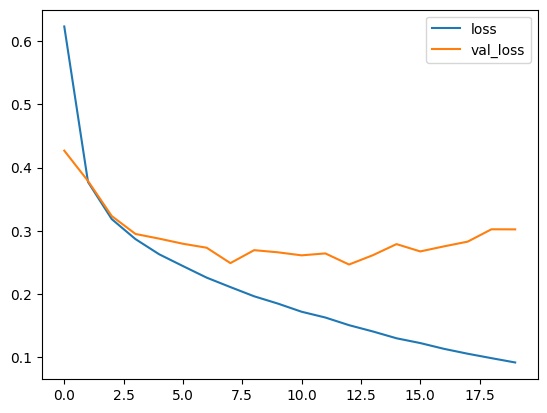

In [ ]:
metrics[['loss','val_loss']].plot()
plt.show()

Аналогічну закономірність показує графік функцій втрат

Для підвищення точності можна включити в модель регуляризацію, нпр, через аугментацію даних

Прогнозування

In [ ]:
#Прогноз на тесті
predictions_prob = model.predict(x_test)

#Прогноз першого значення з тестової вибірки
predictions_prob[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


array([1.4349211e-12, 5.9638351e-13, 2.1418425e-12, 6.3631800e-15,
       7.8734406e-15, 3.5142506e-07, 5.2129232e-13, 6.4805306e-08,
       6.2051524e-11, 9.9999958e-01], dtype=float32)

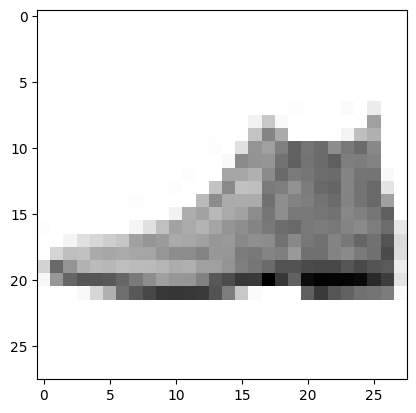

In [ ]:
#Відображення першого елемента з тестової вибірки для порівняння його з прогнозом
plt.imshow(x_test[0], cmap='Greys')
plt.show()


In [ ]:
predictions_prob[0].argmax()

9

Перевірили візуально справжність прогнозу для першого елементу тестової вибірки

In [ ]:
# Знаходження класів прогнозів
predictions = np.argmax(predictions_prob, axis=1)
predictions[0:5] # прогнозні класи перших 5 об'єктів вибірки

array([9, 2, 1, 1, 0])

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.82      0.92      0.86      1000
           3       0.94      0.90      0.92      1000
           4       0.86      0.87      0.87      1000
           5       0.99      0.98      0.98      1000
           6       0.79      0.70      0.75      1000
           7       0.96      0.95      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Бачимо, що найкраще модель класифікує класи 1-Trouser, 5-Sandal, найгірше - 6-Shirt

Виведемо та проілюструємо Confusion matrix


In [ ]:
confusion_matrix(y_test,predictions)

array([[868,   1,  24,  13,   5,   0,  81,   1,   7,   0],
       [  1, 986,   0,   6,   2,   0,   3,   0,   2,   0],
       [ 18,   0, 915,   5,  31,   0,  31,   0,   0,   0],
       [ 12,   8,  18, 902,  29,   0,  29,   0,   2,   0],
       [  1,   1,  73,  17, 870,   0,  37,   0,   1,   0],
       [  0,   0,   1,   0,   0, 978,   0,  11,   1,   9],
       [113,   0,  82,  17,  71,   0, 704,   0,  13,   0],
       [  0,   0,   0,   0,   0,   4,   0, 953,   3,  40],
       [  1,   1,   4,   2,   2,   0,   1,   3, 985,   1],
       [  1,   0,   0,   0,   0,   4,   0,  20,   0, 975]])

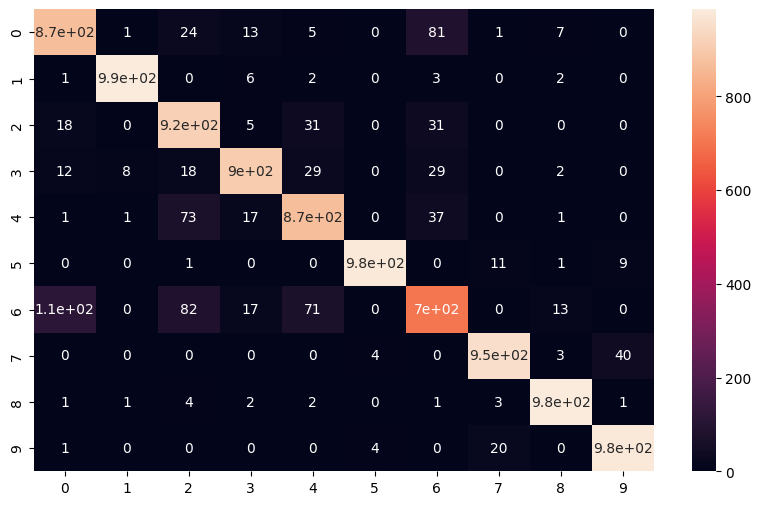

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
plt.show()

Як видно з матриці помилок, причиною того, що клас 6 (сорочки) ідентифікується слабо, є їхня візуальна схожість з класами 0 (T-shirt/top), 2 (Pullover) та 4 (Coat), через що модель невірно визначає класи. Також багато випадків помилок між класами 2 і 4.

Також подивимось детальніше на випадки, де модель помилилась

In [ ]:
#маска для визначення помилок у прогнозі
y_test!=predictions

array([False, False, False, ..., False, False, False])

In [ ]:
#Вивід індексів картинок, на яких помилилась модель
misclassified_images = [i for i, x in enumerate(y_test!=predictions) if x==True]
misclassified_images[:9] #для ілюстрації - вивід 9 перших

[4, 14, 17, 23, 25, 32, 42, 43, 49]

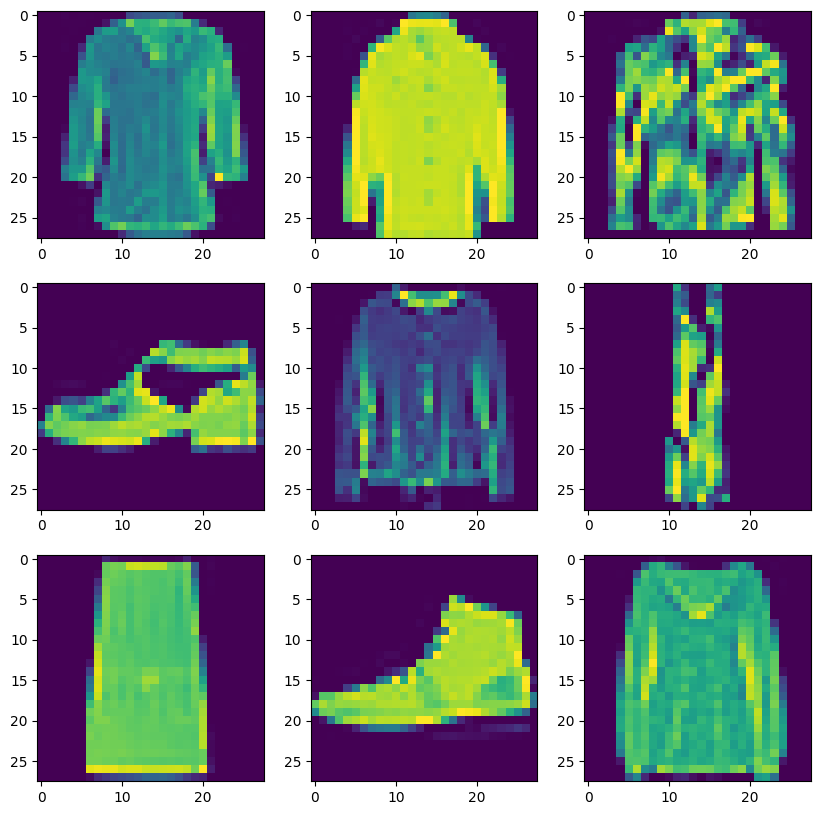

In [ ]:
#зобразимо 9 перших невірно визначених об'єктів моделлю
plt.figure(figsize=(10,10))

actuals = []
for i , number in enumerate(misclassified_images[:9]):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(x_test[number].reshape(28,28))
  actuals.append(y_test[number])
plt.show()

In [ ]:
list(predictions[misclassified_images[:9]])

[0, 2, 6, 5, 2, 1, 6, 9, 6]

In [ ]:
actuals

[6, 4, 4, 9, 4, 3, 3, 7, 2]

 Labels

*   0 T-shirt/top
*   1 Trouser
*   2 Pullover
*   3 Dress
*   4 Coat
*   5 Sandal
*   6 Shirt
*   7 Sneaker
*   8 Bag
*   9 Ankle boot

Найбільшою проблемою для моделі є схожість класів 0,2,4,6 (і це візуально видно на останній ілюстрації), через що відносно багато хибних спрацювань між ними.
Можливі рекомендації для покращення: проведення аугментації даних, після чого тренування на більшій кількості епох, врахування колірності (RGB).
Також потрібно зазначити низьку роздільну здатність малюнків датасету, що ускладнює досягнення високого рівня ефективності моделей.